# Import Neccessary Libraries

In [1]:
import numpy as np        # For numerical operations

In [2]:
import pandas as pd       # For data manipulation and analysis

In [3]:
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

In [4]:
# Importing WordCloud for text visualization
from wordcloud import WordCloud

In [5]:
# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords

In [6]:
# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BASHARAT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BASHARAT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Load The Data

In [7]:
df = pd.read_csv("spam_ham_dataset.csv")
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [9]:
# Drop the columns
df.drop(columns = ['Unnamed: 0', 'label'], inplace = True)

In [10]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [11]:
  # Rename the columns name
df.rename(columns = {'label_num': 'target'}, inplace = True)

In [12]:
df.head()

,text,target
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [13]:
#checking missing values
df.isnull().sum()

text      0
target    0
dtype: int64

In [14]:
#check duplicate values
df.duplicated().sum()

178

In [15]:
#remove Duplicate
df = df.drop_duplicates(keep = 'first')

In [16]:
#check duplicate values after remove duplicate
df.duplicated().sum()

0

In [17]:
df.shape

(4993, 2)

# Exploratory Data Analysis (EDA)

In [18]:
#Percentage of Ham and Spam

values = df['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 70.71900660925296
percentage of 1 : 29.280993390747046


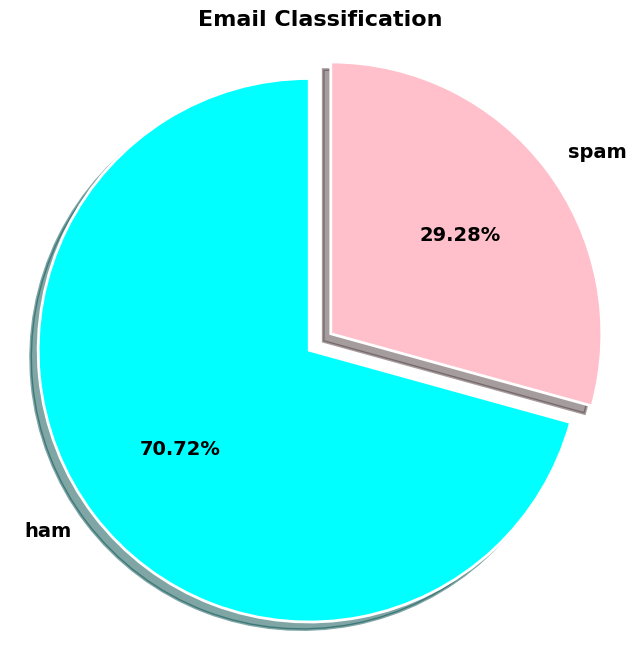

In [19]:
# Define colors
colors = ['cyan', 'pink']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

As you see to the graph the percentage of ham is too high (70.72%) as compare to spam messages percentage. so the data is imbalance

In [20]:
# Text Length and Structure Analysis
# Create a deep copy of the DataFrame to avoid SettingWithCopyWarning
df = df.copy()

# Text Length and Structure Analysis
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [21]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.386942
std,1547.863387,340.702932,27.959959
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [22]:
# Summary Statistics for Legitimate Messages

df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe() #ham (non-spam)

,num_characters,num_words,num_sentence
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,11.662419
std,1402.785831,337.018933,25.330035
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,4.000000
50%,538.000000,128.000000,7.000000
75%,1253.500000,298.500000,13.500000
max,32258.000000,8863.000000,1204.000000


In [23]:
#  Summary Statistics for Spam Messages

df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.551984
std,1840.112883,349.439381,33.111447
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,693.000000


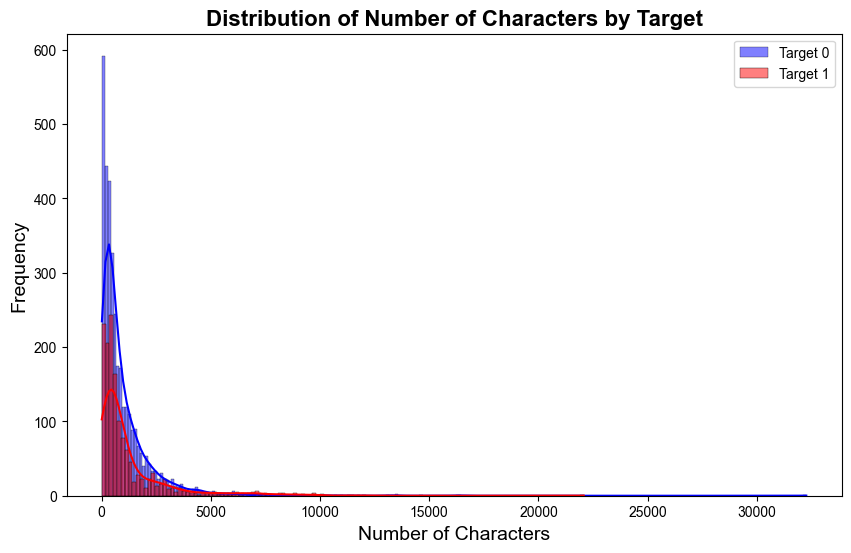

In [24]:
# Character Length Distribution for Legitimate and Spam Messages

import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

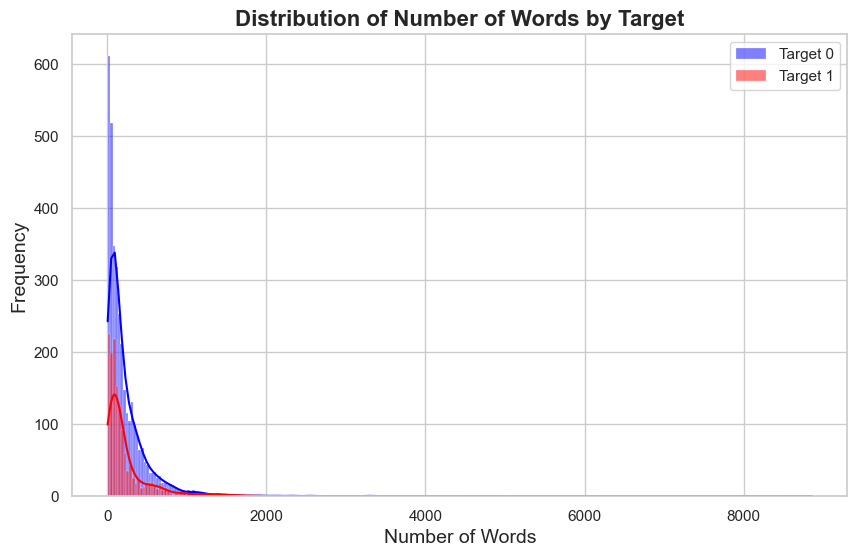

In [25]:
# Word Count Distribution for Legitimate and Spam Messages

import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

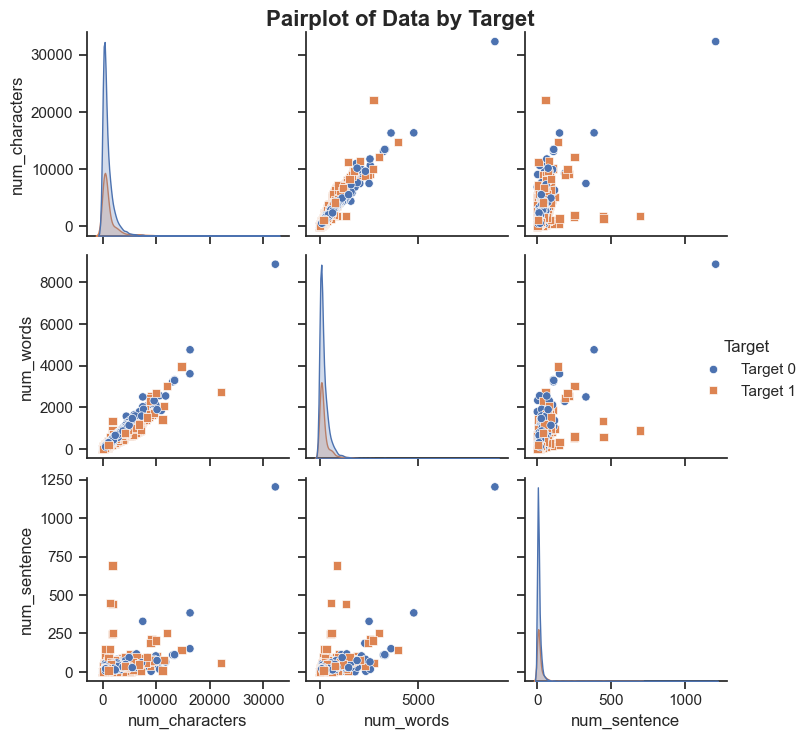

In [26]:
# Pairplot for Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the position of the title

# Customize the legend
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()

In [27]:
 # Coorelation

df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.074794,0.014425,0.095863
num_characters,0.074794,1.000000,0.970492,0.630026
num_words,0.014425,0.970492,1.000000,0.703256
num_sentence,0.095863,0.630026,0.703256,1.000000


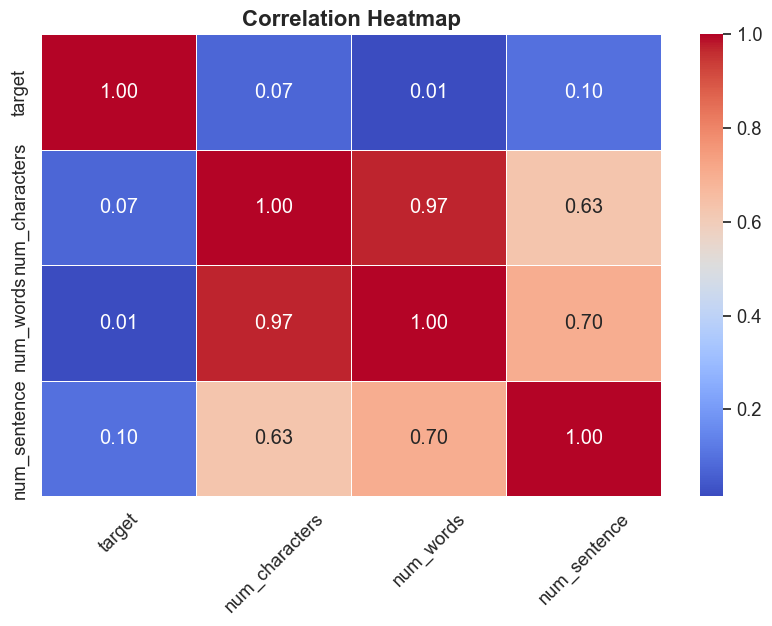

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()

# Data Preprocessing

In [29]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

In [30]:
# Importing the string module for handling special characters
import string

In [31]:
# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

In [32]:
# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)

In [33]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [34]:
# Creating a New Column: 'transformed_text'

df['transformed_text'] = df['text'].apply(transform_text)

In [35]:
df.head(5)

,text,target,num_characters,num_words,num_sentence,transformed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


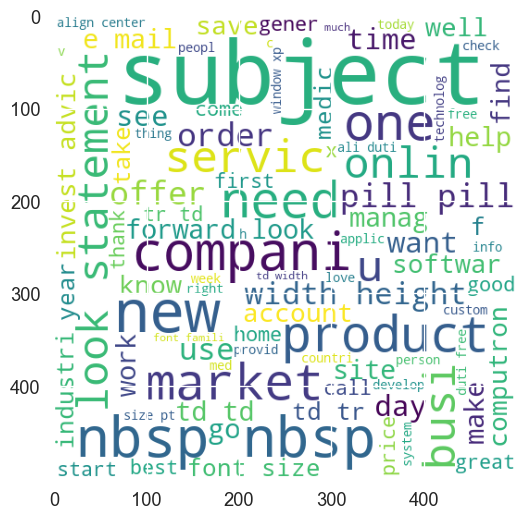

In [36]:
# Word Cloud for Spam Messages

wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

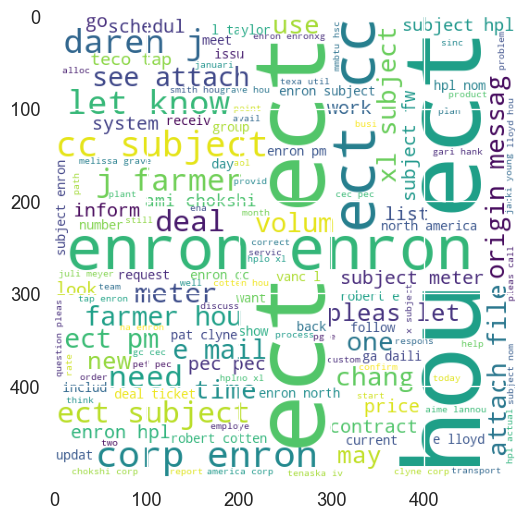

In [37]:
#  Word Cloud for Not spam Messages

ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()


In [38]:
#  Find top 30 words of spam

spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [39]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

C:\Users\BASHARAT\AppData\Local\Temp\ipykernel_6256\2512895475.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')


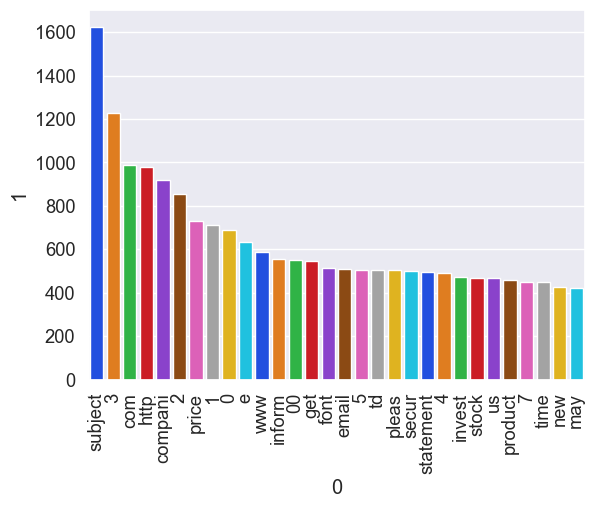

In [40]:
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

In [41]:
# Find top 30 words of Not spam Messages

ham_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [42]:
filter_ham_df = pd.DataFrame(Counter(ham_carpos).most_common(30))

C:\Users\BASHARAT\AppData\Local\Temp\ipykernel_6256\699915630.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')


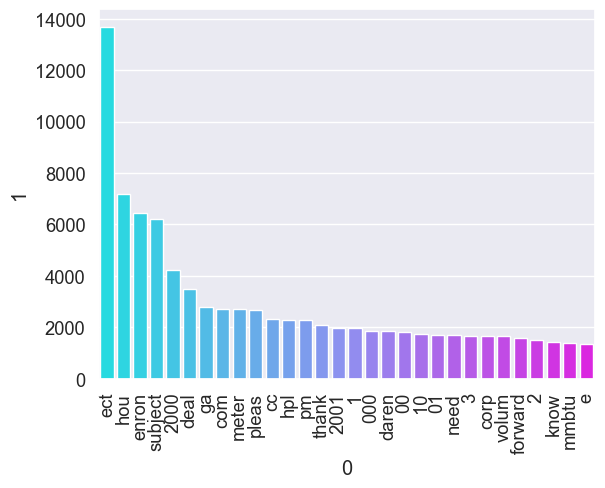

In [43]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

# Model Building

In [198]:
# Initializing CountVectorizer and TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

ERROR! Session/line number was not unique in database. History logging moved to new session 76


In [199]:
# Dependent and Independent Variable

X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values


In [200]:
#  Split into Train and Test Data

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 2)


In [201]:
from sklearn.linear_model import LogisticRegression

In [202]:
from sklearn.svm import SVC

In [203]:
from sklearn.naive_bayes import MultinomialNB

In [204]:
from sklearn.tree import DecisionTreeClassifier

In [205]:
from sklearn.neighbors import KNeighborsClassifier

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
from sklearn.ensemble import AdaBoostClassifier

In [208]:
from sklearn.ensemble import BaggingClassifier

In [209]:
from sklearn.ensemble import ExtraTreesClassifier

In [210]:
from sklearn.ensemble import GradientBoostingClassifier

In [211]:
# Initialize the Models

In [212]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)

In [213]:

mnb = MultinomialNB()

In [214]:
knc = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')


In [215]:

dtc = DecisionTreeClassifier(max_depth = 5)

In [216]:

lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')

In [217]:

rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )

In [218]:

abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)

In [219]:

bc = BaggingClassifier(n_estimators = 50, random_state = 2)

In [220]:

etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)

In [221]:

gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)

In [222]:
# Train the Models

from sklearn.metrics import accuracy_score, precision_score,confusion_matrix

In [223]:
#Dictionary of the model

clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    
}

In [224]:

accuracy_scores = []
precision_scores = []
confusion_mat = []

def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    cm = confusion_matrix(y_test,y_pred)
    return accuracy , precision , cm


# Evaluate the Models

In [225]:

# Iterate over the dictionary of classifiers
for name, clfs in clfs.items():
    current_accuracy, current_precision ,current_cm = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    print("Confusion_matrix:\n", current_cm)



For:  SVC
Accuracy:  0.979305740987984
Precision:  0.96875
Confusion_matrix:
 [[1033   14]
 [  17  434]]

For:  KNN
Accuracy:  0.9579439252336449
Precision:  0.9429223744292238
Confusion_matrix:
 [[1022   25]
 [  38  413]]

For:  NB
Accuracy:  0.9419225634178905
Precision:  0.8791666666666667
Confusion_matrix:
 [[989  58]
 [ 29 422]]

For:  DT
Accuracy:  0.8411214953271028
Precision:  0.6625954198473283
Confusion_matrix:
 [[826 221]
 [ 17 434]]

For:  LR
Accuracy:  0.9532710280373832
Precision:  0.89937106918239
Confusion_matrix:
 [[999  48]
 [ 22 429]]

For:  RF
Accuracy:  0.9626168224299065
Precision:  0.9340659340659341
Confusion_matrix:
 [[1017   30]
 [  26  425]]

For:  Adaboost
Accuracy:  0.9532710280373832
Precision:  0.913232104121475
Confusion_matrix:
 [[1007   40]
 [  30  421]]

For:  Bgc
Accuracy:  0.9432576769025367
Precision:  0.8943965517241379
Confusion_matrix:
 [[998  49]
 [ 36 415]]

For:  ETC
Accuracy:  0.9746328437917223
Precision:  0.9558498896247241
Confusion_matr

# CONCLUSION

# Testing Email Classification Using User-Selected Classifier

In [240]:
# Define the testing function for emails
def test_email(message, model, tfidf_vectorizer):
    # Preprocess the message
    preprocessed_message = transform_text(message)
    
    # Transform the message into TF-IDF features
    message_features = tfidf_vectorizer.transform([preprocessed_message]).toarray()
    
    # Predict using the model
    prediction = model.predict(message_features)
    
    # Return prediction (0 for ham, 1 for spam)
    return prediction[0]

# Ask the user to enter an email message
email_message = input("Enter the email message to test: ")

# List available classifiers
print("Available classifiers:")
for name in clfs.keys():
    print(f"- {name}")

# Ask the user which classifier to use
chosen_classifier_name = input("Enter the name of the classifier to use: ")

# Check if the classifier name exists in the dictionary
if chosen_classifier_name in clfs:
    chosen_classifier = clfs[chosen_classifier_name]

    # Test the email with the chosen classifier
    prediction = test_email(email_message, chosen_classifier, tfid)
    result = "Spam" if prediction == 1 else "Ham"

    print(f"\nThe email is classified as: {result} using {chosen_classifier_name}.")
else:
    print(f"Error: '{chosen_classifier_name}' is not a valid classifier name.")


Enter the email message to test:  Congratulations! You have been selected to receive a Benazir Income Support Program grant of PKR 25,000. Please provide your bank account details to receive the funds. Failure to respond within 24 hours will result in the cancellation of your grant. Call us at +92-123-456-7890.


Available classifiers:
- SVC
- KNN
- NB
- DT
- LR
- RF
- Adaboost
- Bgc
- ETC
- GBDT


Enter the name of the classifier to use:  SVC



The email is classified as: Spam using SVC.
